In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [58]:
hr_df = pd.read_csv('HR_Employee_Attrition_Data.csv')
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [59]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [60]:
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [61]:
cat = hr_df.select_dtypes(exclude=[np.number]).columns.tolist()
print('Categorical : ', cat)
num = hr_df.select_dtypes(include=[np.number]).columns.tolist()
print('Numerical : ', num)

Categorical :  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Numerical :  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [62]:
missing_data = hr_df.isnull().mean()*100
missing_data = missing_data[missing_data>0]

print(missing_data)

Series([], dtype: float64)


The dataset doesnot have any null values

Dropping Columns with zero Variance

In [63]:
zero_var_col = []

for col in hr_df:
    if(hr_df[col].nunique() <=1):
        zero_var_col.append(col)

print(zero_var_col)

hr_df = hr_df.drop(zero_var_col, axis=1)


['EmployeeCount', 'Over18', 'StandardHours']


Plotting data

Text(0.5, 1.0, 'Attrition based on monthly Income')

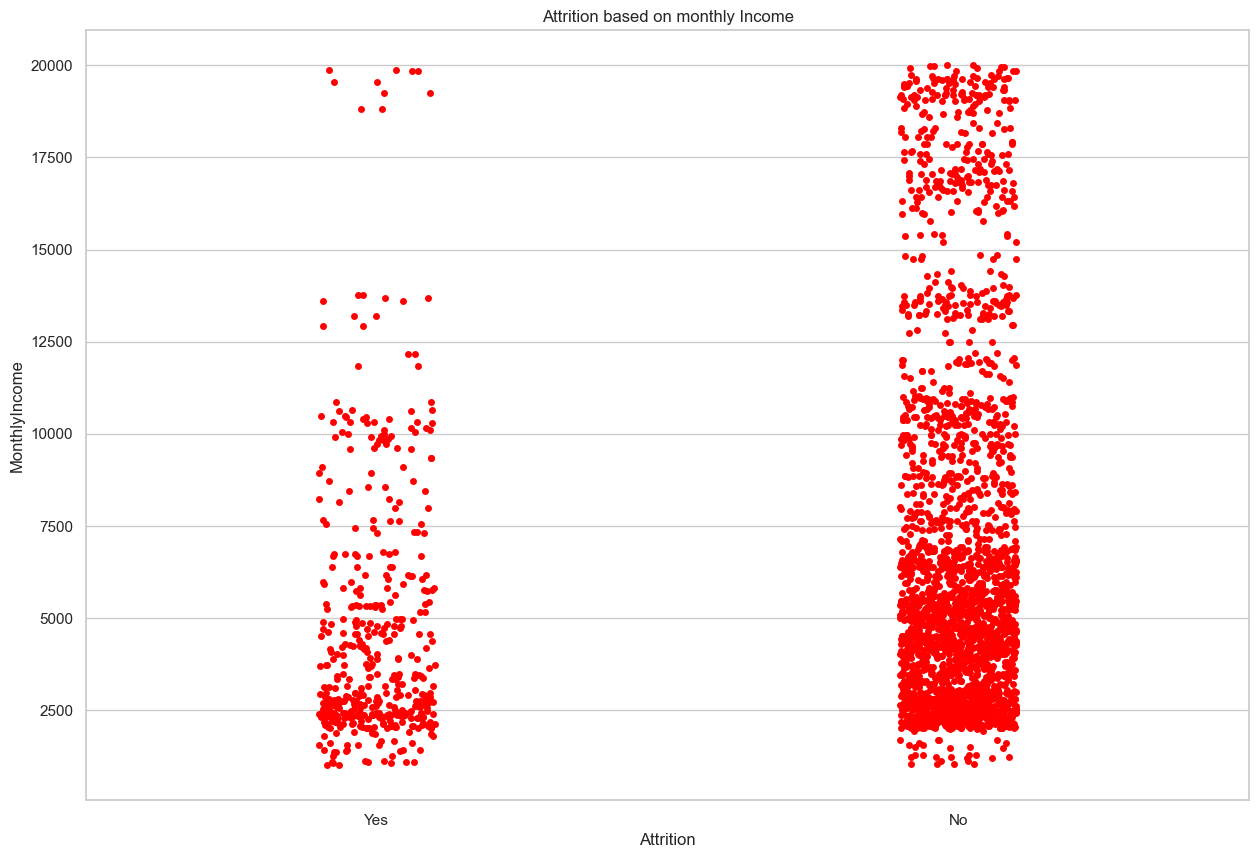

In [64]:
plt.figure(figsize=[15,10])
sns.stripplot(data= hr_df, x= 'Attrition', y= 'MonthlyIncome', color='Red')
plt.title('Attrition based on monthly Income')

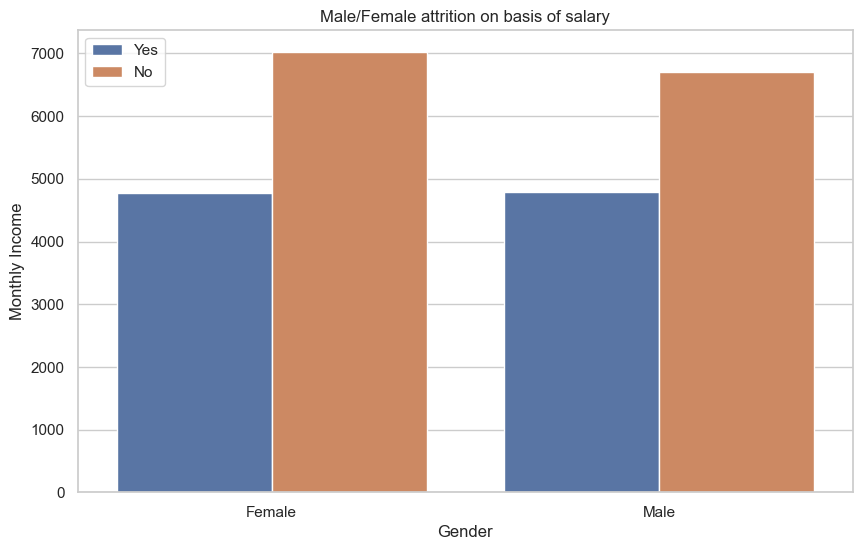

In [65]:
# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='MonthlyIncome', hue='Attrition', data=hr_df, ci=None)
plt.title('Male/Female attrition on basis of salary')
plt.xlabel('Gender')
plt.ylabel('Monthly Income')
plt.legend()
plt.show()

<Axes: xlabel='MonthlyIncome'>

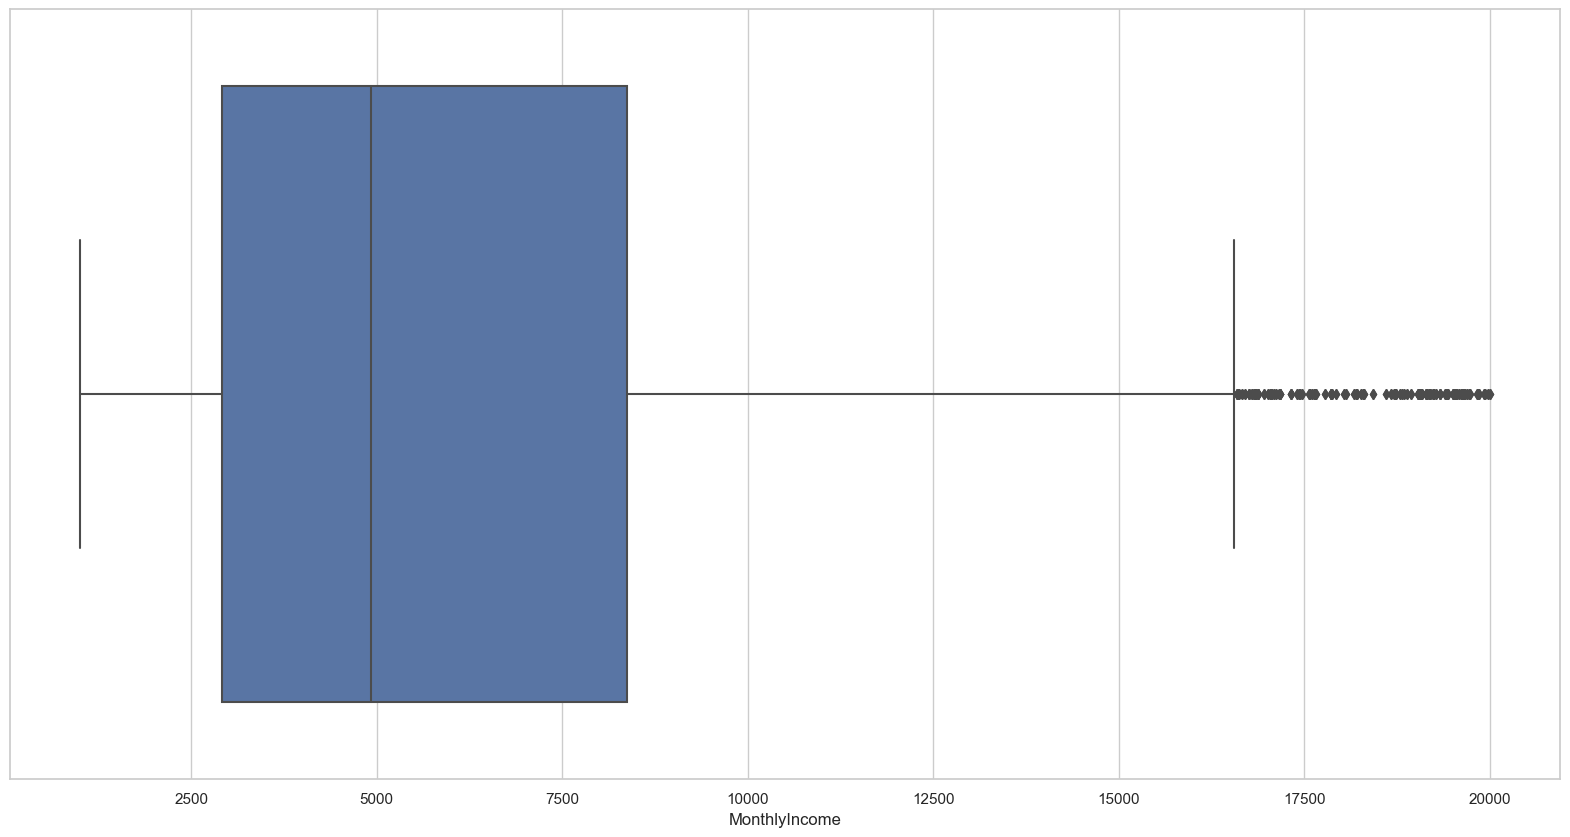

In [66]:
plt.figure(figsize=[20,10])
sns.boxplot(data=hr_df, x='MonthlyIncome')

<Axes: xlabel='HourlyRate'>

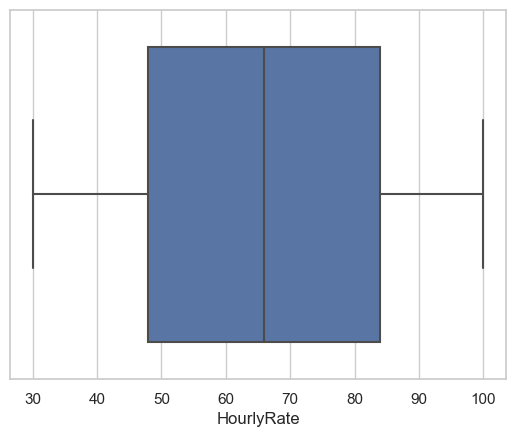

In [67]:
sns.boxplot(data=hr_df, x='HourlyRate')

<Axes: xlabel='MonthlyRate'>

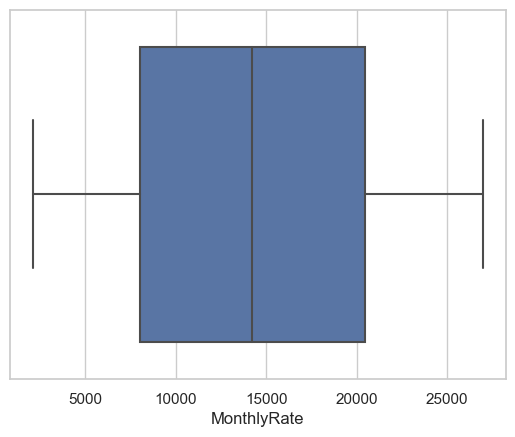

In [68]:
sns.boxplot(data=hr_df, x='MonthlyRate')

<Axes: xlabel='PercentSalaryHike'>

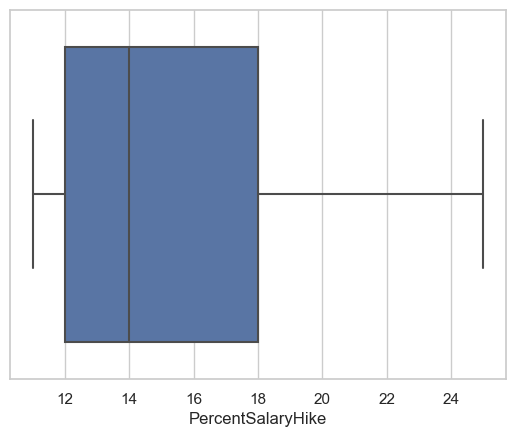

In [69]:
sns.boxplot(data=hr_df, x='PercentSalaryHike')

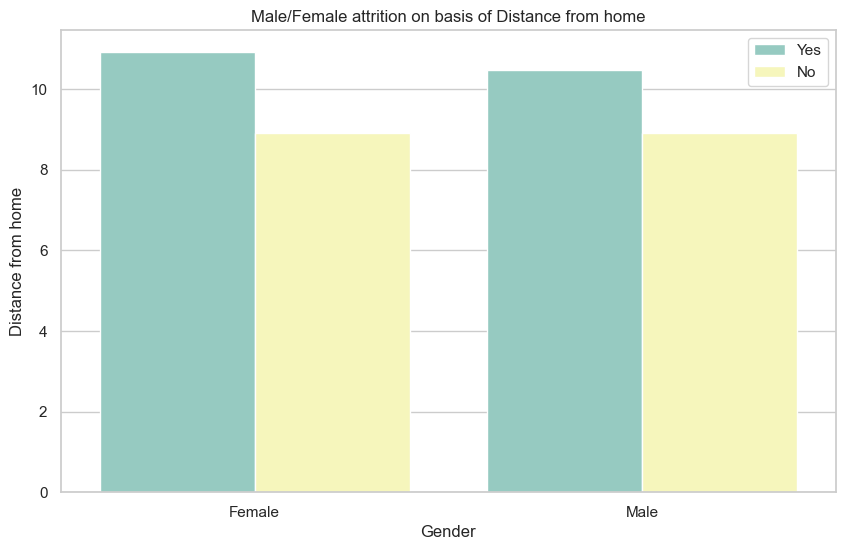

In [70]:
# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='DistanceFromHome', hue='Attrition', palette='Set3', data=hr_df, ci=None)
plt.title('Male/Female attrition on basis of Distance from home')
plt.xlabel('Gender')
plt.ylabel('Distance from home')
plt.legend()
plt.show()

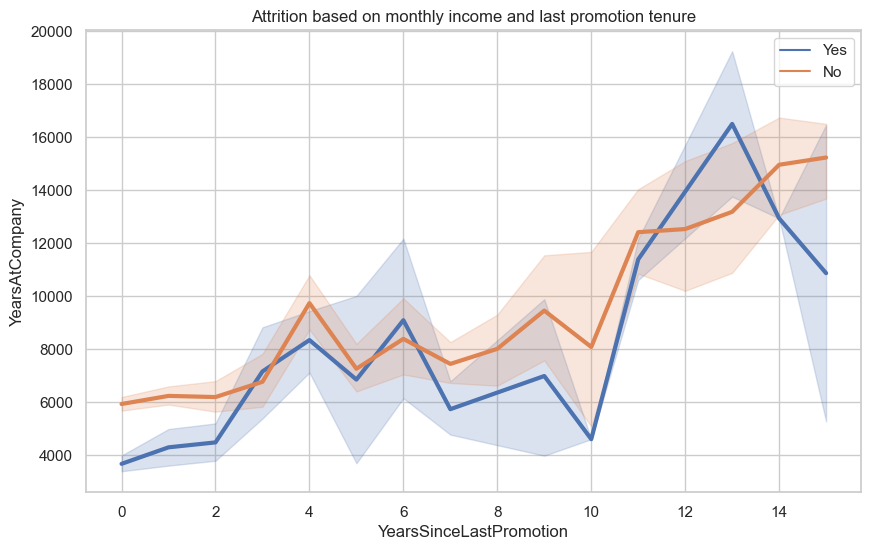

In [71]:
# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='YearsSinceLastPromotion', y='MonthlyIncome', hue='Attrition',linewidth=3, data=hr_df)
plt.title('Attrition based on monthly income and last promotion tenure')
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('YearsAtCompany')
plt.legend()
plt.show()

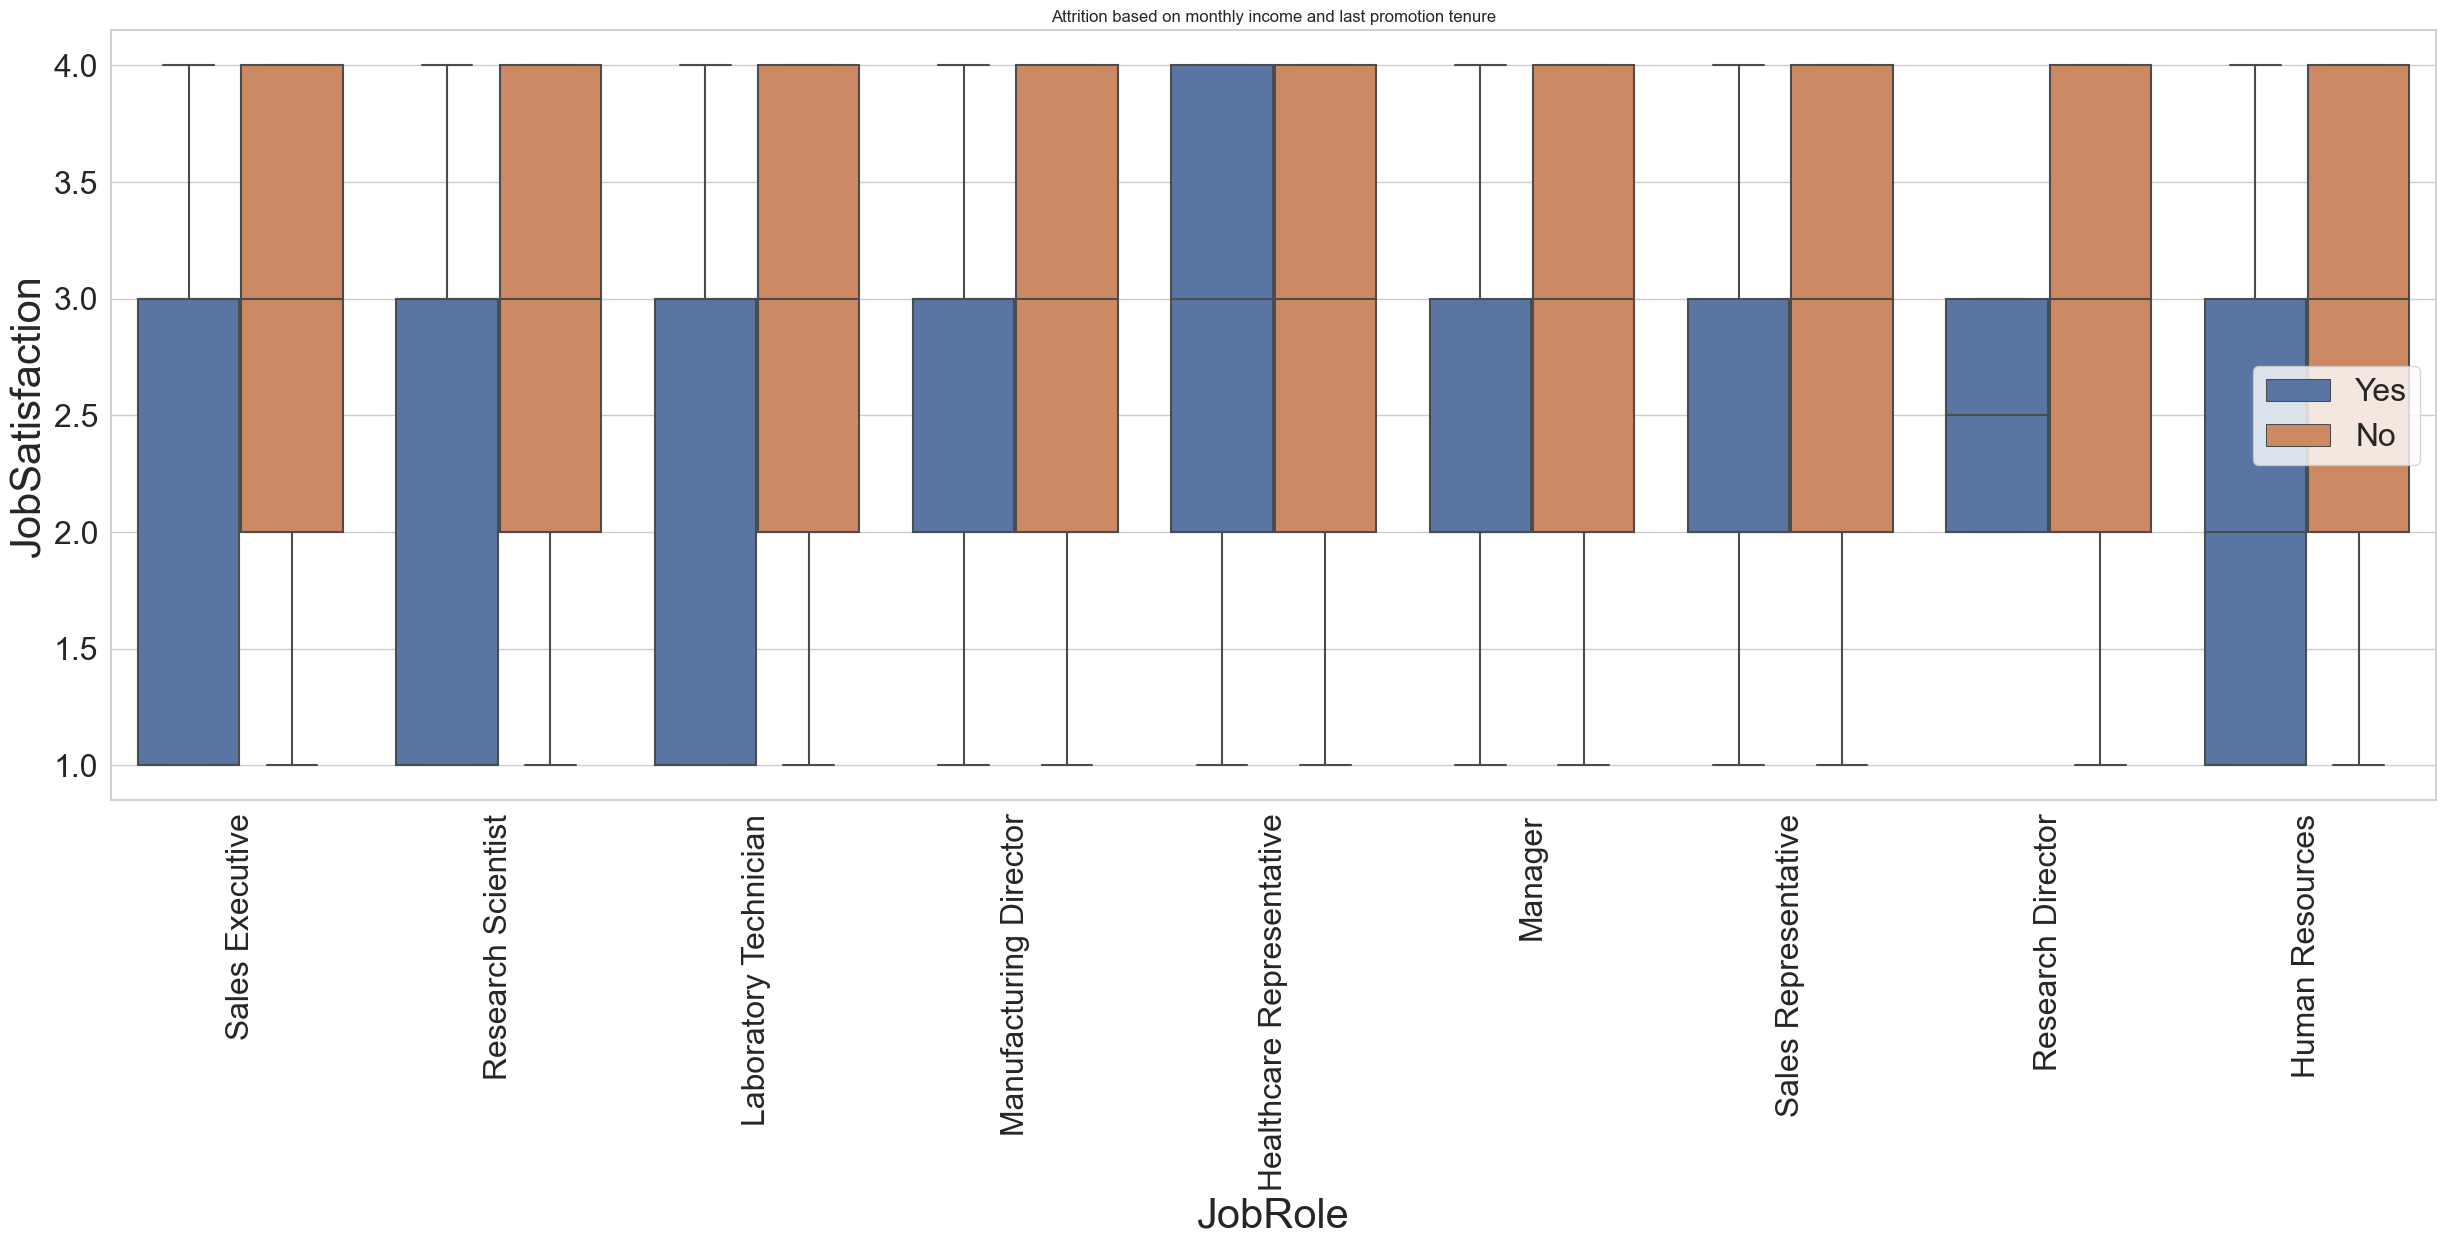

In [72]:
# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(30, 10))
sns.boxplot(x='JobRole', y='JobSatisfaction', hue='Attrition', data=hr_df)
plt.title('Attrition based on monthly income and last promotion tenure')
plt.xlabel('JobRole', fontsize=30)
plt.ylabel('JobSatisfaction', fontsize=30)
plt.xticks(rotation = 90, fontsize = 23)
plt.yticks(fontsize = 23)
plt.legend(fontsize = 23)
plt.show()

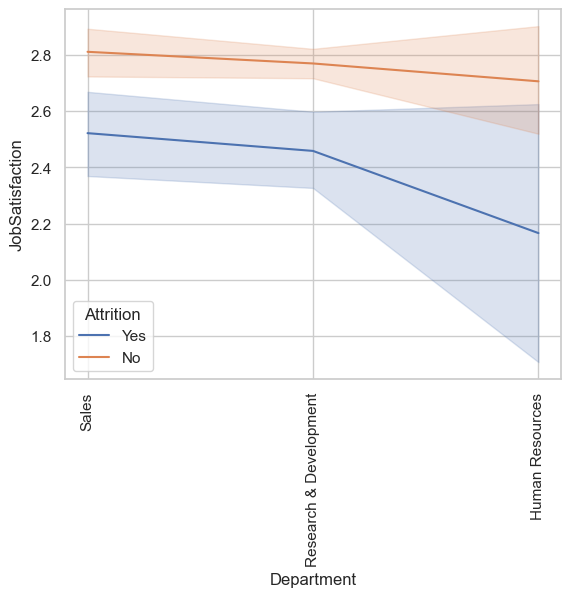

In [73]:
# Plotting
sns.set(style="whitegrid")

sns.lineplot(data=hr_df, hue='Attrition', y='JobSatisfaction', x='Department')
plt.ylabel('JobSatisfaction')
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.show()

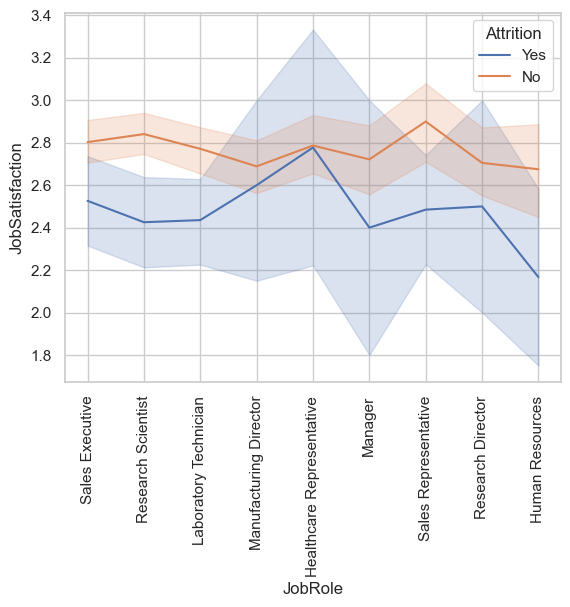

In [74]:
# Plotting
sns.set(style="whitegrid")

sns.lineplot(data=hr_df, hue='Attrition', x='JobRole', y='JobSatisfaction')
plt.ylabel('JobSatisfaction')
plt.xlabel('JobRole')
plt.xticks(rotation = 90)
plt.show()

<Axes: >

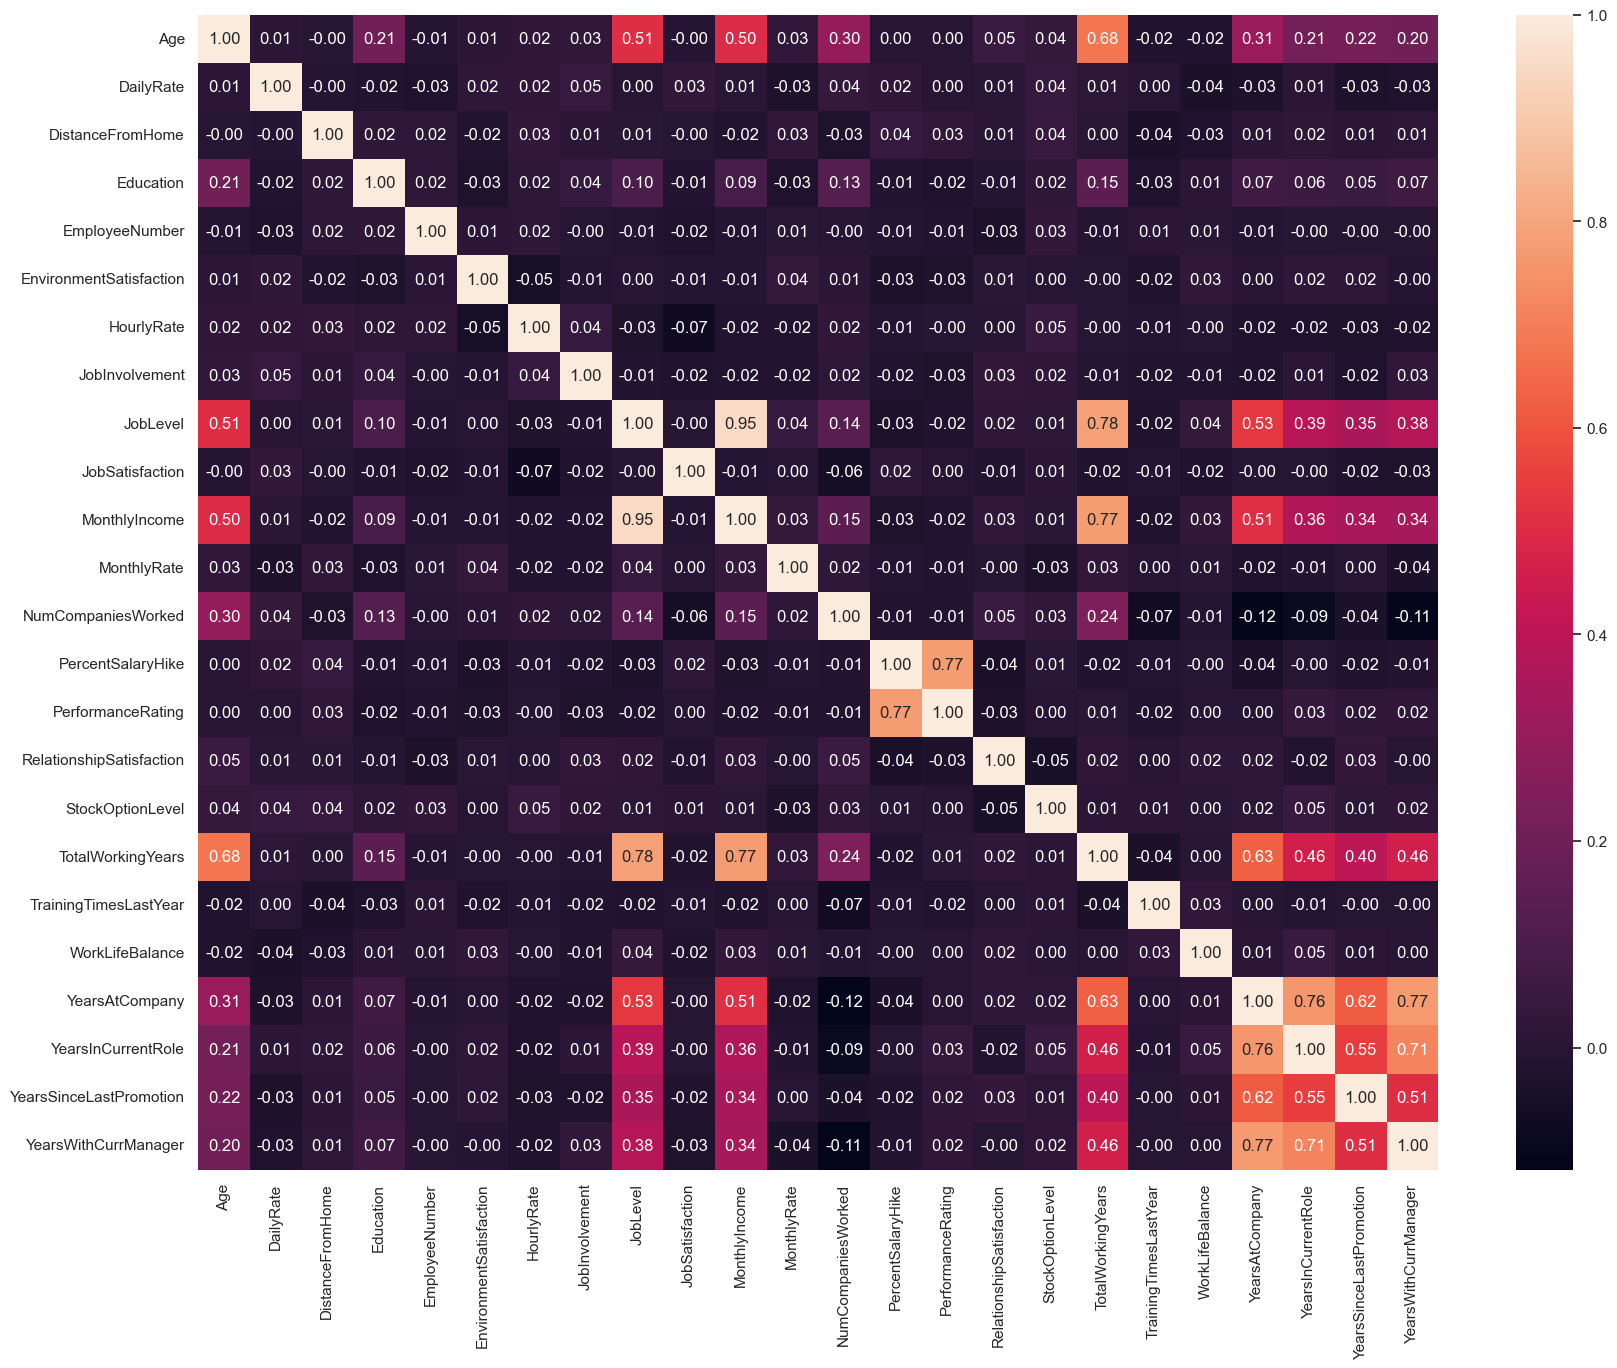

In [75]:
plt.figure(figsize=[20,15])
sns.heatmap(data= hr_df.select_dtypes(include=[np.number]).corr(), annot = True, fmt = '.2f')

In [76]:
%pip install feature.engine

Note: you may need to restart the kernel to use updated packages.


In [77]:
from feature_engine.selection import DropCorrelatedFeatures

tr = DropCorrelatedFeatures(variables= None, method='pearson', threshold=0.75)

uncorrelated_data = tr.fit_transform(hr_df.select_dtypes(include=[np.number]))

print(tr.correlated_feature_sets_)

print(tr.features_to_drop_)

uncorrelated_data.head()

[{'TotalWorkingYears', 'JobLevel', 'MonthlyIncome'}, {'PercentSalaryHike', 'PerformanceRating'}, {'YearsInCurrentRole', 'YearsAtCompany', 'YearsWithCurrManager'}]
{'YearsInCurrentRole', 'MonthlyIncome', 'TotalWorkingYears', 'PerformanceRating', 'YearsWithCurrManager'}


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1102,1,2,1,2,94,3,2,4,19479,8,11,1,0,0,1,6,0
1,49,279,8,1,2,3,61,2,2,2,24907,1,23,4,1,3,3,10,1
2,37,1373,2,2,3,4,92,2,1,3,2396,6,15,2,0,3,3,0,0
3,33,1392,3,4,4,4,56,3,1,3,23159,1,11,3,0,3,3,8,3
4,27,591,2,1,5,1,40,3,1,2,16632,9,12,4,1,3,3,2,2


Transforming categorical data

In [78]:
cat = hr_df.select_dtypes(exclude=[np.number])

bin_list = []

ohe_list = []

oth_list = []

for col in cat.columns.tolist():
    if(cat[col].nunique()==2):
        bin_list.append(col)
    if(cat[col].nunique()>2):
        ohe_list.append(col)
    if(cat[col].nunique()<2):
        oth_list.append(col)

print(cat.columns.tolist())

print(bin_list)

print(ohe_list)

print(oth_list)



['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
['Attrition', 'Gender', 'OverTime']
['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
[]


In [87]:
label_encoder = LabelEncoder()

for col in cat.columns:
    cat[col] = label_encoder.fit_transform(cat[col])

data1 = pd.concat([uncorrelated_data, cat], axis=1)
data1.to_csv('un-encoded_hr_data.csv')

Transforming binary columns

In [79]:
for col in bin_list:
    cat[col] = cat[col].apply(lambda x : 1 if x=='Yes' or x=='Male' else 0)

cat[bin_list].head()

,Attrition,Gender,OverTime
0,1,0,1
1,0,1,0
2,1,1,1
3,0,0,1
4,0,1,0


Transforming columns in one hot encoding

In [80]:
cat = pd.get_dummies(data=cat, columns= ohe_list, drop_first=True)
cat = cat.astype(int)

cat.head()

,Attrition,Gender,OverTime,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1,0,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


Merging uncorrelated numerical and encoded categorical columns

In [81]:
data = pd.concat([uncorrelated_data, cat], axis=1)
data.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,0,0,1,0,0,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1373,2,2,3,4,92,2,1,3,...,0,1,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,4,56,3,1,3,...,0,0,0,0,0,1,0,0,1,0
4,27,591,2,1,5,1,40,3,1,2,...,0,1,0,0,0,0,0,0,1,0


In [82]:
data.to_csv('proc_data_Hr.csv')